In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
my_df = pd.read_csv('diabetes.csv')

In [5]:
my_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**FEATURE SELECTION**



*   correlation heatmap




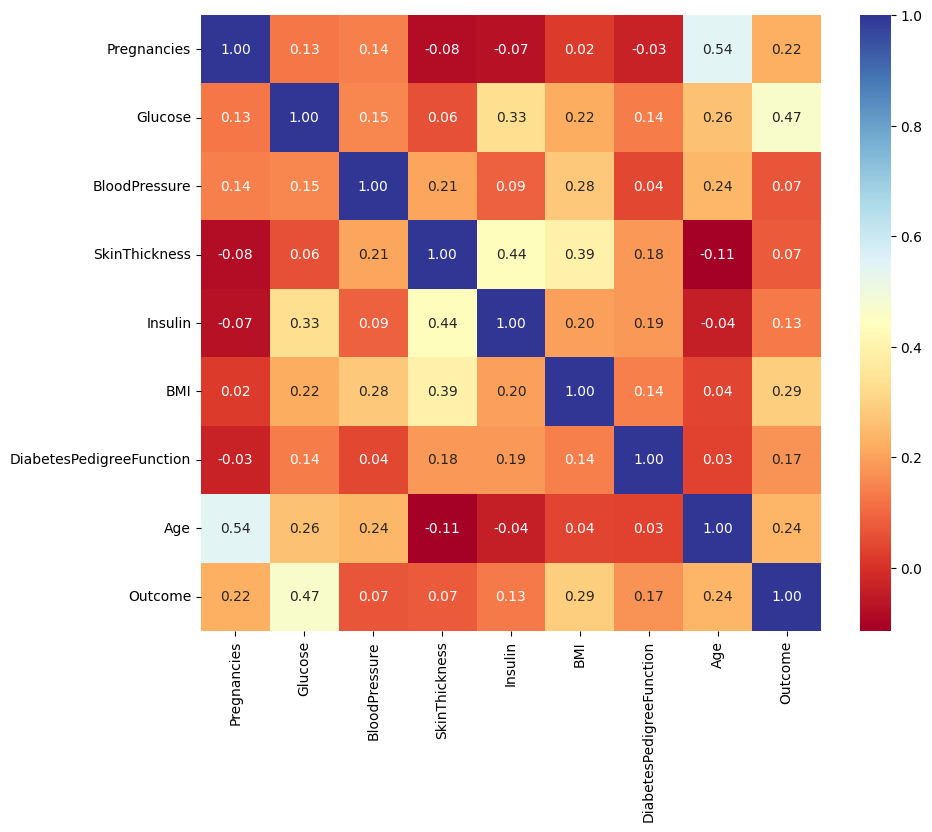

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(my_df.corr(), cmap='RdYlBu', annot=True, fmt=".2f")
plt.show()

In [7]:
my_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# to_drop = ['BloodPressure', 'SkinThickness']
# my_df = my_df.drop(columns=to_drop)



*   RFE




In [9]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [10]:
xx = my_df.drop(columns=['Outcome'])
yy = my_df['Outcome']

In [11]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)
rfe.fit(xx, yy)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)

In [12]:
rankings = pd.DataFrame({
    'features': xx.columns,
    'ranking': rfe.ranking_
}).sort_values(by='ranking', ascending=True)
print(rankings)
print(xx.columns[rfe.support_])

                   features  ranking
1                   Glucose        1
5                       BMI        1
6  DiabetesPedigreeFunction        1
7                       Age        1
2             BloodPressure        2
0               Pregnancies        3
4                   Insulin        4
3             SkinThickness        5
Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [13]:
class Model(nn.Module):

  def __init__(self, input_size=4, hl1=17, hl2=11, hl3=12, output_size=3):
    super().__init__()
    self.fc1 = nn.Linear(input_size,hl1)
    self.fc2 = nn.Linear(hl1, hl2)
    self.fc3 = nn.Linear(hl2, hl3)
    self.fout = nn.Linear(hl3, output_size)

  def move_forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fout(x)

    return x


In [14]:
torch.manual_seed(41)
model = Model()

In [15]:
my_df = my_df[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [16]:
my_df

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,33.6,0.627,50,1
1,85,26.6,0.351,31,0
2,183,23.3,0.672,32,1
3,89,28.1,0.167,21,0
4,137,43.1,2.288,33,1
...,...,...,...,...,...
763,101,32.9,0.171,63,0
764,122,36.8,0.340,27,0
765,121,26.2,0.245,30,0
766,126,30.1,0.349,47,1


In [17]:
X = my_df.iloc[:, :-1]
y = my_df.iloc[:, -1]

In [18]:
X

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33
...,...,...,...,...
763,101,32.9,0.171,63
764,122,36.8,0.340,27
765,121,26.2,0.245,30
766,126,30.1,0.349,47


In [19]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 334 to 102
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   537 non-null    int64  
 1   BMI                       537 non-null    float64
 2   DiabetesPedigreeFunction  537 non-null    float64
 3   Age                       537 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 21.0 KB


In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 351 to 86
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   116 non-null    int64  
 1   BMI                       116 non-null    float64
 2   DiabetesPedigreeFunction  116 non-null    float64
 3   Age                       116 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 4.5 KB


In [23]:
y_train

,Outcome
334,0
139,0
485,1
547,0
18,0
...,...
71,0
106,0
270,1
435,1


In [24]:
y_test

,Outcome
351,0
210,0
148,0
44,0
356,1
...,...
220,1
579,1
583,0
764,0


In [25]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
X_val = torch.FloatTensor(X_val.values)

In [26]:
X_train

tensor([[ 95.0000,  23.9000,   0.2600,  22.0000],
        [105.0000,  36.9000,   0.1590,  28.0000],
        [135.0000,  42.3000,   0.3650,  24.0000],
        ...,
        [101.0000,  45.6000,   1.1360,  38.0000],
        [141.0000,  42.4000,   0.2050,  29.0000],
        [125.0000,  22.5000,   0.2620,  21.0000]])

In [27]:
X_test

tensor([[1.3700e+02, 3.1200e+01, 2.5200e-01, 3.0000e+01],
        [8.1000e+01, 2.7700e+01, 2.9000e-01, 2.5000e+01],
        [1.4700e+02, 3.3700e+01, 2.1800e-01, 6.5000e+01],
        [1.5900e+02, 2.7400e+01, 2.9400e-01, 4.0000e+01],
        [1.2500e+02, 3.3300e+01, 9.6200e-01, 2.8000e+01],
        [8.5000e+01, 3.0100e+01, 3.0000e-01, 3.5000e+01],
        [1.8400e+02, 3.5500e+01, 3.5500e-01, 4.1000e+01],
        [1.0200e+02, 0.0000e+00, 5.7200e-01, 2.1000e+01],
        [8.4000e+01, 0.0000e+00, 3.0400e-01, 2.1000e+01],
        [1.1500e+02, 0.0000e+00, 2.6100e-01, 3.0000e+01],
        [1.2400e+02, 2.1800e+01, 4.5200e-01, 2.1000e+01],
        [1.4000e+02, 4.2600e+01, 4.3100e-01, 2.4000e+01],
        [1.0600e+02, 3.1200e+01, 3.8000e-01, 4.2000e+01],
        [1.0400e+02, 2.9900e+01, 7.2200e-01, 4.1000e+01],
        [1.0200e+02, 2.9300e+01, 6.9500e-01, 2.7000e+01],
        [1.5800e+02, 4.2300e+01, 2.5700e-01, 4.4000e+01],
        [8.5000e+01, 2.9000e+01, 1.2240e+00, 3.2000e+01],
        [1.620

In [28]:
y_val = torch.LongTensor(y_val.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [29]:
y_test

tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [30]:
y_train

tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [31]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [32]:
# Training the model

epochs = 100
losses = []

for i in range(epochs):
  y_predict = model.move_forward(X_train)

  train_loss = criterion(y_predict, y_train)
  losses.append(train_loss.detach().numpy())
  if i % 10 == 0:
    print(f'{i} and {train_loss}')

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()


0 and 1.5600351095199585
10 and 0.6562300324440002
20 and 0.6536186933517456
30 and 0.6354863047599792
40 and 0.6233048439025879
50 and 0.6125528812408447
60 and 0.6022271513938904
70 and 0.5925084948539734
80 and 0.5816366672515869
90 and 0.5712152123451233


Text(0, 0.5, 'losses')

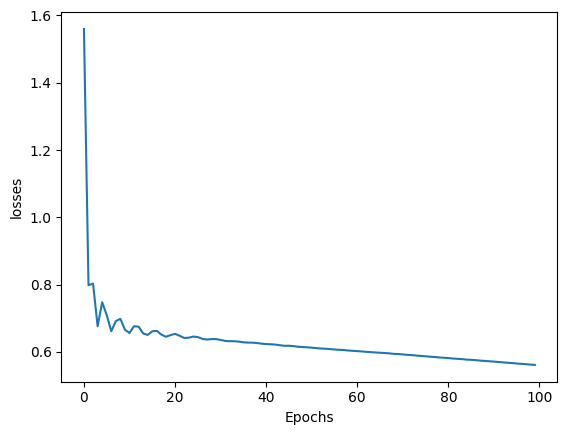

In [33]:
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("losses")


Playing with the validation set

In [34]:
model.eval()
with torch.no_grad():
  y_valid = model.move_forward(X_val)
  validation_loss = criterion(y_valid, y_val)

  print("validation loss: ", validation_loss)

validation loss:  tensor(0.5750)


In [35]:
validation_correct = 0

for i, data in enumerate(X_val):
  y_valid = model.move_forward(data)
  print(f"index{i+1} model-->{y_valid.argmax().item()} data-->{y_val[i]}")

  if y_valid.argmax().item() == y_val[i]:
    validation_correct += 1

print(f"we got {validation_correct} correct out of {len(y_val)}")
accuracy = validation_correct/len(y_val)*100


index1 model-->1 data-->1
index2 model-->0 data-->1
index3 model-->1 data-->1
index4 model-->1 data-->0
index5 model-->0 data-->0
index6 model-->1 data-->0
index7 model-->0 data-->0
index8 model-->0 data-->0
index9 model-->0 data-->0
index10 model-->0 data-->0
index11 model-->0 data-->0
index12 model-->0 data-->0
index13 model-->0 data-->0
index14 model-->0 data-->1
index15 model-->1 data-->1
index16 model-->0 data-->0
index17 model-->1 data-->0
index18 model-->0 data-->1
index19 model-->0 data-->0
index20 model-->0 data-->0
index21 model-->1 data-->0
index22 model-->0 data-->0
index23 model-->0 data-->0
index24 model-->0 data-->0
index25 model-->0 data-->0
index26 model-->0 data-->0
index27 model-->0 data-->0
index28 model-->0 data-->0
index29 model-->0 data-->1
index30 model-->0 data-->0
index31 model-->0 data-->1
index32 model-->0 data-->1
index33 model-->0 data-->1
index34 model-->0 data-->0
index35 model-->0 data-->0
index36 model-->0 data-->1
index37 model-->0 data-->1
index38 mo

In [36]:
print(f"Model validation accuracy: {round(accuracy)}%")

Model validation accuracy: 71%


Playing with the test set

In [37]:
with torch.no_grad():
  y_eval = model.move_forward(X_test)
  test_loss = criterion(y_eval, y_test)
  print("test loss", test_loss)

test loss tensor(0.5829)


In [38]:
# check the number that we got corrrect
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_eval = model.move_forward(data)

    print(f"index {i+1}, model-->{y_eval.argmax().item()}, data -->{y_test[i].item()}")

    if y_eval.argmax().item() == y_test[i]:
      correct += 1

  print(f"we got {correct} correct out of {len(y_test)}")
  accuracy = correct/len(y_test) * 100

index 1, model-->0, data -->0
index 2, model-->0, data -->0
index 3, model-->1, data -->0
index 4, model-->1, data -->0
index 5, model-->0, data -->1
index 6, model-->0, data -->0
index 7, model-->1, data -->1
index 8, model-->0, data -->0
index 9, model-->0, data -->0
index 10, model-->0, data -->1
index 11, model-->0, data -->0
index 12, model-->0, data -->1
index 13, model-->0, data -->0
index 14, model-->0, data -->1
index 15, model-->0, data -->0
index 16, model-->0, data -->1
index 17, model-->0, data -->1
index 18, model-->0, data -->1
index 19, model-->0, data -->1
index 20, model-->0, data -->0
index 21, model-->0, data -->1
index 22, model-->0, data -->0
index 23, model-->0, data -->0
index 24, model-->0, data -->0
index 25, model-->0, data -->0
index 26, model-->1, data -->1
index 27, model-->0, data -->0
index 28, model-->0, data -->0
index 29, model-->1, data -->1
index 30, model-->0, data -->0
index 31, model-->0, data -->1
index 32, model-->1, data -->1
index 33, model--

In [39]:
print(f" Model has an accuracy of {round(accuracy)}%")

 Model has an accuracy of 71%


** train 1** Model has an accuracy of 67%

** train 2** Model has an accuracy of 72%(added one layer, adjusted learning rate by 0.01)


In [66]:
def prediction(xdata):
  with torch.no_grad():
    new_prediction = model.move_forward(xdata)
    if new_prediction.argmax().item() == 1:
      x = "There's a high likelihood that you have diabetes!"
      print(x)
    else:
      x = "You have no diabetes at all!"
      print(x)

In [59]:
x = input("Enter the following results like this :")
data = [float(i.strip()) for i in x.split(",")]
data = torch.tensor(data)
print(data)

Enter the following results like this :148, 33.6, 0.627, 50
tensor([148.0000,  33.6000,   0.6270,  50.0000])


In [65]:
prediction(xdata=data)

There's a high likelihood that you have diabetes!


In [68]:
torch.save(model.state_dict(), "NeuraD.pt")

In [69]:
new_model = Model()
new_model.load_state_dict(torch.load("NeuraD.pt"))

<ipython-input-69-2d1860963bc9>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("NeuraD.pt"))


<All keys matched successfully>

In [70]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=17, bias=True)
  (fc2): Linear(in_features=17, out_features=11, bias=True)
  (fc3): Linear(in_features=11, out_features=12, bias=True)
  (fout): Linear(in_features=12, out_features=3, bias=True)
)

In [72]:
def prediction(xdata):
  with torch.no_grad():
    new_prediction = new_model.move_forward(xdata)
    if new_prediction.argmax().item() == 1:
      x = "There's a high likelihood that you have diabetes!"
      print(x)
    else:
      x = "You have no diabetes at all!"
      print(x)

x = input("Enter the following results like this :")
data = [float(i.strip()) for i in x.split(",")]
data = torch.tensor(data)
prediction(data)

Enter the following results like this :148, 33.6, 0.627, 50
There's a high likelihood that you have diabetes!


In [75]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=17, bias=True)
  (fc2): Linear(in_features=17, out_features=11, bias=True)
  (fc3): Linear(in_features=11, out_features=12, bias=True)
  (fout): Linear(in_features=12, out_features=3, bias=True)
)